Step 1: Import Required Libraries



In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score


Step 2: Load the Dataset



In [2]:
# Replace with your dataset path
df = pd.read_csv('/content/loan_data.csv')  # Example dataset

# Explore dataset
print(df.head())
print(df.info())
print(df.describe())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

Step 3: Data Preprocessing

In [5]:


# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Feature-target split
X = df.drop('loan_status', axis=1)  # Replace 'Loan_Status' with the target column
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Feature Scaling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 5: Train Multiple Classifiers

In [7]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Support Vector Machine': SVC(probability=True)
}

# Train and evaluate models
results = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {'Accuracy': accuracy, 'ROC-AUC': roc_auc}

    print(f"{name}:\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression:

Accuracy: 0.8901
ROC-AUC: 0.9483
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000

--------------------------------------------------
Decision Tree:

Accuracy: 0.8963
ROC-AUC: 0.8528
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6990
           1       0.76      0.77      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000

--------------------------------------------------
Gradient Boosting:

Accuracy: 0.9201
ROC-AUC: 0.9698
              precision    recall  f1-score   support

           0       0.93      0.9

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:

Accuracy: 0.9321
ROC-AUC: 0.9775
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

--------------------------------------------------
Support Vector Machine:

Accuracy: 0.9078
ROC-AUC: 0.9570
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6990
           1       0.83      0.74      0.78      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000

--------------------------------------------------


Step 6: Visualize Performance

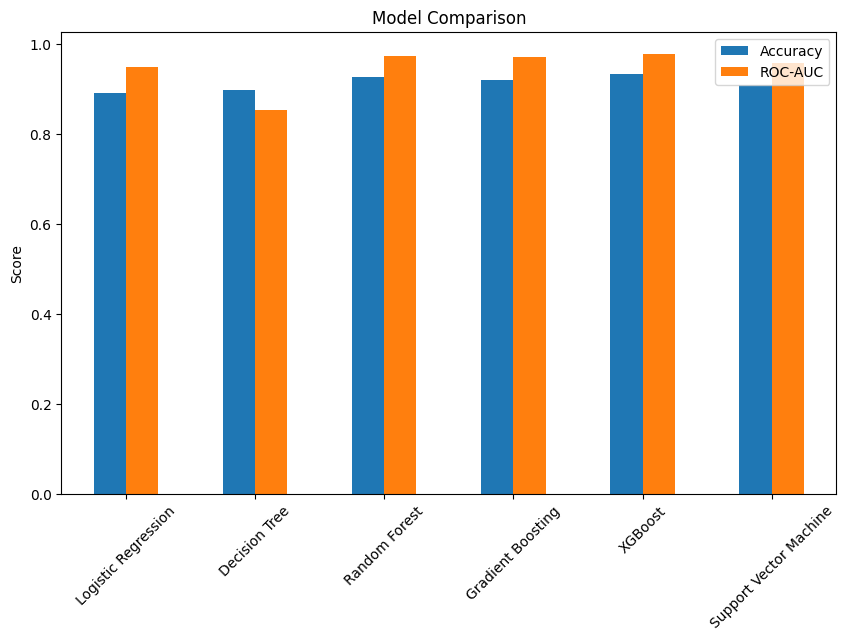

In [8]:
# Visualize performance
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6), title='Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


Step 7: Save the Best Model


In [9]:
import joblib

# Save the best-performing model
best_model_name = results_df['ROC-AUC'].idxmax()
best_model = classifiers[best_model_name]
joblib.dump(best_model, 'best_loan_approval_model.pkl')

print(f"Best Model: {best_model_name} saved as 'best_loan_approval_model.pkl'")


Best Model: XGBoost saved as 'best_loan_approval_model.pkl'
